In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
np.random.seed(0)
data = {
    'Battery Capacity (kWh)': np.random.uniform(30, 80, 100),
    'Vehicle Weight (kg)': np.random.uniform(1000, 2500, 100),
    'Range (km)': 2.5 * np.random.uniform(30, 80, 100) + np.random.randn(100) * 10
       }
df = pd.DataFrame(data)

In [5]:
X = df[['Battery Capacity (kWh)', 'Vehicle Weight (kg)']]
y = df['Range (km)']
print(X,y)

    Battery Capacity (kWh)  Vehicle Weight (kg)
0                57.440675          2016.724805
1                65.759468          1405.011960
2                60.138169          2102.791033
3                57.244159          2443.282818
4                51.182740          1373.129715
..                     ...                  ...
95               39.159568          1735.688213
96               59.325647          1341.121942
97               31.005377          1381.534723
98               71.447001          1087.043740
99               30.234774          1651.624938

[100 rows x 2 columns] 0     115.539551
1     164.364746
2     116.245819
3      95.071242
4      63.844232
         ...    
95     94.909699
96     89.975724
97    173.864789
98    185.041384
99    191.981410
Name: Range (km), Length: 100, dtype: float64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train)

    Battery Capacity (kWh)  Vehicle Weight (kg)
55               38.065476          2272.012344
88               58.797325          2095.183044
26               37.167664          1028.789797
42               64.881560          1653.797388
69               34.804920          1257.444516
..                     ...                  ...
60               37.948479          2046.143160
71               53.432560          1081.506983
14               33.551803          2220.696730
92               36.589893          1279.289509
51               51.930076          2302.189086

[80 rows x 2 columns]


In [8]:
print(X_test)

    Battery Capacity (kWh)  Vehicle Weight (kg)
83               64.623606          1356.839232
53               35.102241          1923.339346
70               78.822973          1781.554909
45               63.531893          2055.832875
44               63.338336          2209.290984
39               64.091015          1647.127653
22               53.073968          2434.125452
80               45.899159          1247.041235
10               69.586252          1670.688068
0                57.440675          2016.724805
18               68.907838          2322.603043
30               43.227781          1927.023143
73               60.242276          1027.782692
33               58.421697          1447.423489
90               45.928448          1597.331593
4                51.182740          1373.129715
76               44.140348          1518.027521
77               36.009828          2392.121940
12               58.402228          2049.218913
31               68.711684          1643

In [9]:
print(y_test)

83     75.058873
53    189.227881
70    198.164142
45     96.781535
44    168.597924
39    150.235829
22    101.059112
80     98.284951
10    213.737214
0     115.539551
18    145.449510
30     99.486732
73    198.896828
33     84.311634
90    120.651361
4      63.844232
76    191.490573
77    168.098541
12    162.147363
31     87.830358
Name: Range (km), dtype: float64


In [10]:
print(y_train)

55     95.629532
88    133.325123
26    162.355566
42    136.563527
69    147.072363
         ...    
60     94.651064
71    190.392692
14     71.207005
92    177.148453
51    191.392954
Name: Range (km), Length: 80, dtype: float64


In [11]:
model = LinearRegression()


In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2321.080846154448


In [15]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.31313777 -0.02043388]
Intercept: 190.85659115252977


In [16]:
new_ev = np.array([[60, 1500]])  # New EV with 60 kWh battery and 1500 kg weight
predicted_range = model.predict(new_ev)
print(f"Predicted Range for the New EV: {predicted_range[0]} km")

Predicted Range for the New EV: 141.41749930854616 km


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


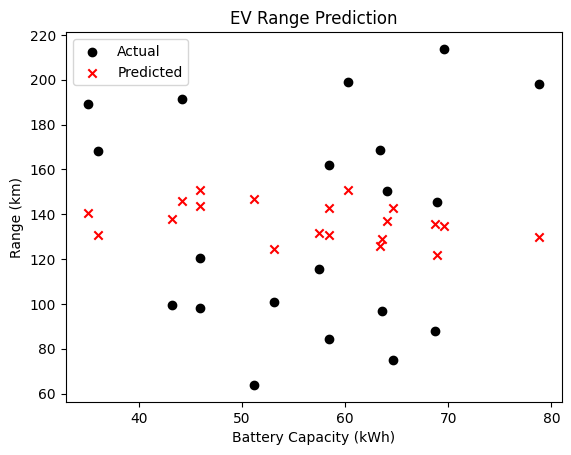

In [17]:
plt.scatter(X_test['Battery Capacity (kWh)'], y_test, color='black', label='Actual')
plt.scatter(X_test['Battery Capacity (kWh)'], y_pred, color='red', marker='x', label='Predicted')
plt.title('EV Range Prediction')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.legend()
plt.show()

This example uses two features ('Battery Capacity' and 'Vehicle Weight') to predict the 'Range' of the electric vehicle. You can modify the features and target variable based on your specific dataset.

**ML ALGORITHMS MODEL**

**MSE**

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Decision Tree Mean Squared Error: {dt_mse}")

Decision Tree Mean Squared Error: 3062.3942085130248


In [19]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define and train the SVM model
svm_model = make_pipeline(StandardScaler(), SVR())
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_mse = mean_squared_error(y_test, svm_predictions)
print(f"SVM Mean Squared Error: {svm_mse}")

SVM Mean Squared Error: 2193.365822771755


In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Define and train the kNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f"kNN Mean Squared Error: {knn_mse}")

kNN Mean Squared Error: 2390.867632907627


In [21]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Creating and training the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
rf_regressor.fit(X_train, y_train)

# Predicting on the testing set
y_pred = rf_regressor.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2642.8313001251718


**RMSE**

In [22]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Creating and training the SVM regressor
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

# Predicting on the testing set
y_pred = svm_regressor.predict(X_test)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 48.791942948122205


In [23]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Creating and training the Decision Tree regressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

# Predicting on the testing set
y_pred = tree_regressor.predict(X_test)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 57.97430749886357


In [24]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Creating and training the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (K) as needed
knn_regressor.fit(X_train, y_train)

# Predicting on the testing set
y_pred = knn_regressor.predict(X_test)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 48.89649918867021


In [25]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Creating and training the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
rf_regressor.fit(X_train, y_train)

# Predicting on the testing set
y_pred = rf_regressor.predict(X_test)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 51.40847498346135
